<a href="https://colab.research.google.com/github/Thiru2208/Telco-Customer-Churn-ML-Coursework/blob/main/2425449_20241152_Thirusha_Kannathasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries and load data**

In [147]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Make platos look a bit nicer by default
sns.set(style = "whitegrid")

In [148]:
# Mount Google Drive to access the dataset stored in cloud storage
drive.mount('/content/drive')

# Load the Telco Customer Churn dataset from Google Drive
path = "/content/drive/MyDrive/ML Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Exploratory Data Analysis (EDA**)

Basic structure: shape, info, summary

In [149]:
# Display the first five records of the dataset to understand its structure
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
# Display the overall size of the dataset (number of rows and columns)
print("Shape of the data:", data.shape)

Shape of the data: (7043, 21)


In [151]:
# Display dataset structure, data types, and non-null value counts
print("\nDataFrame Info")
print(data.info())


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [152]:
# Display descriptive statistics for numerical columns
print("\nDescriptive stats (numeric columns)")
print(data.describe())


Descriptive stats (numeric columns)
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [153]:
# Check for duplicate records in the dataset
print("Duplicate rows in the data")
print(data.duplicated().sum())

Duplicate rows in the data
0


In [154]:
# Display the list of column names and count the total number of features
print(data.columns.tolist())
len(data.columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


21

Check missing values

In [155]:
# Count the number of missing values in each column
print("\nMissing values per column")
print(data.isnull().sum())


Missing values per column
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [156]:
# Display the count of missing (NaN) values in each column
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [157]:
# Identify and display empty (blank string) values in each column
for column in data.columns:
    blank_mask = data[column].astype(str).str.strip() == ""
    num_blanks = blank_mask.sum()

    print(f"{column}: {num_blanks}")

    if num_blanks > 0:
        print(f"\nRows containing empty values in '{column}':")
        display(data[blank_mask])

customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows containing empty values in 'TotalCharges':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [158]:
# Separate numerical and categorical columns for analysis and preprocessing
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [159]:
# Examine unique categories and their frequency distribution for each categorical feature
print("\nUnique Values in Categorical Columns:")
print()

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print()
    print(data[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetServ

In [160]:
# Count and display the proportion of 'unknown' values in each categorical feature
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract


In [161]:
# Analyse the distribution of the target variable (Churn)
# Count the number of customers in each churn class (Yes/No)
churn_counts = data["Churn"].value_counts()
print("\n--- Churn counts ---")
print(churn_counts)


--- Churn counts ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [162]:
# Calculate and display the percentage distribution of the churn classes
churn_pct = churn_counts / len(data) * 100
print("\n--- Churn percentage ---")
print(churn_pct)


--- Churn percentage ---
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


#**Data Visualization**

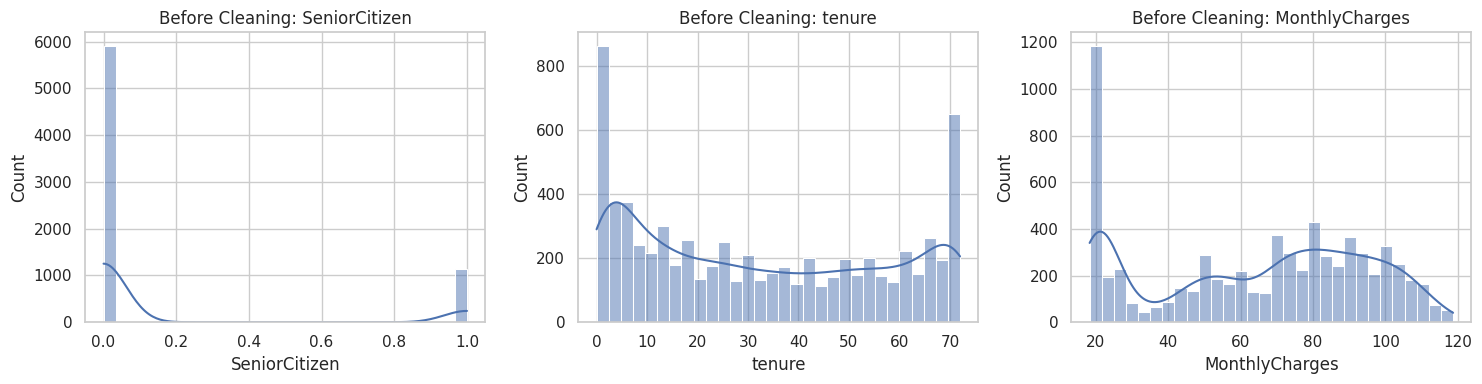

In [163]:
# Plot histograms of numerical features before data cleaning to examine their distributions
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()

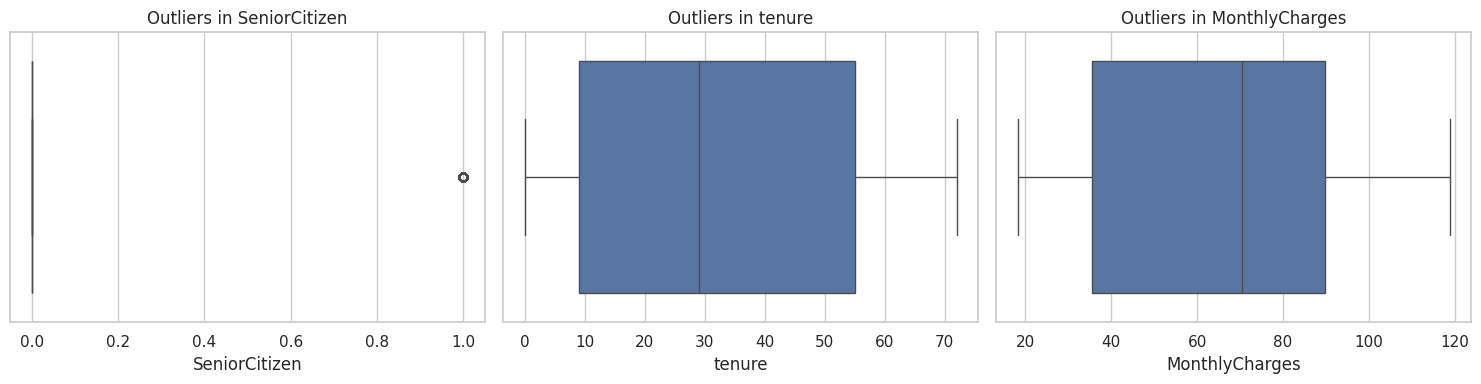

In [164]:
# Plot boxplots for numerical features to identify potential outliers
plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

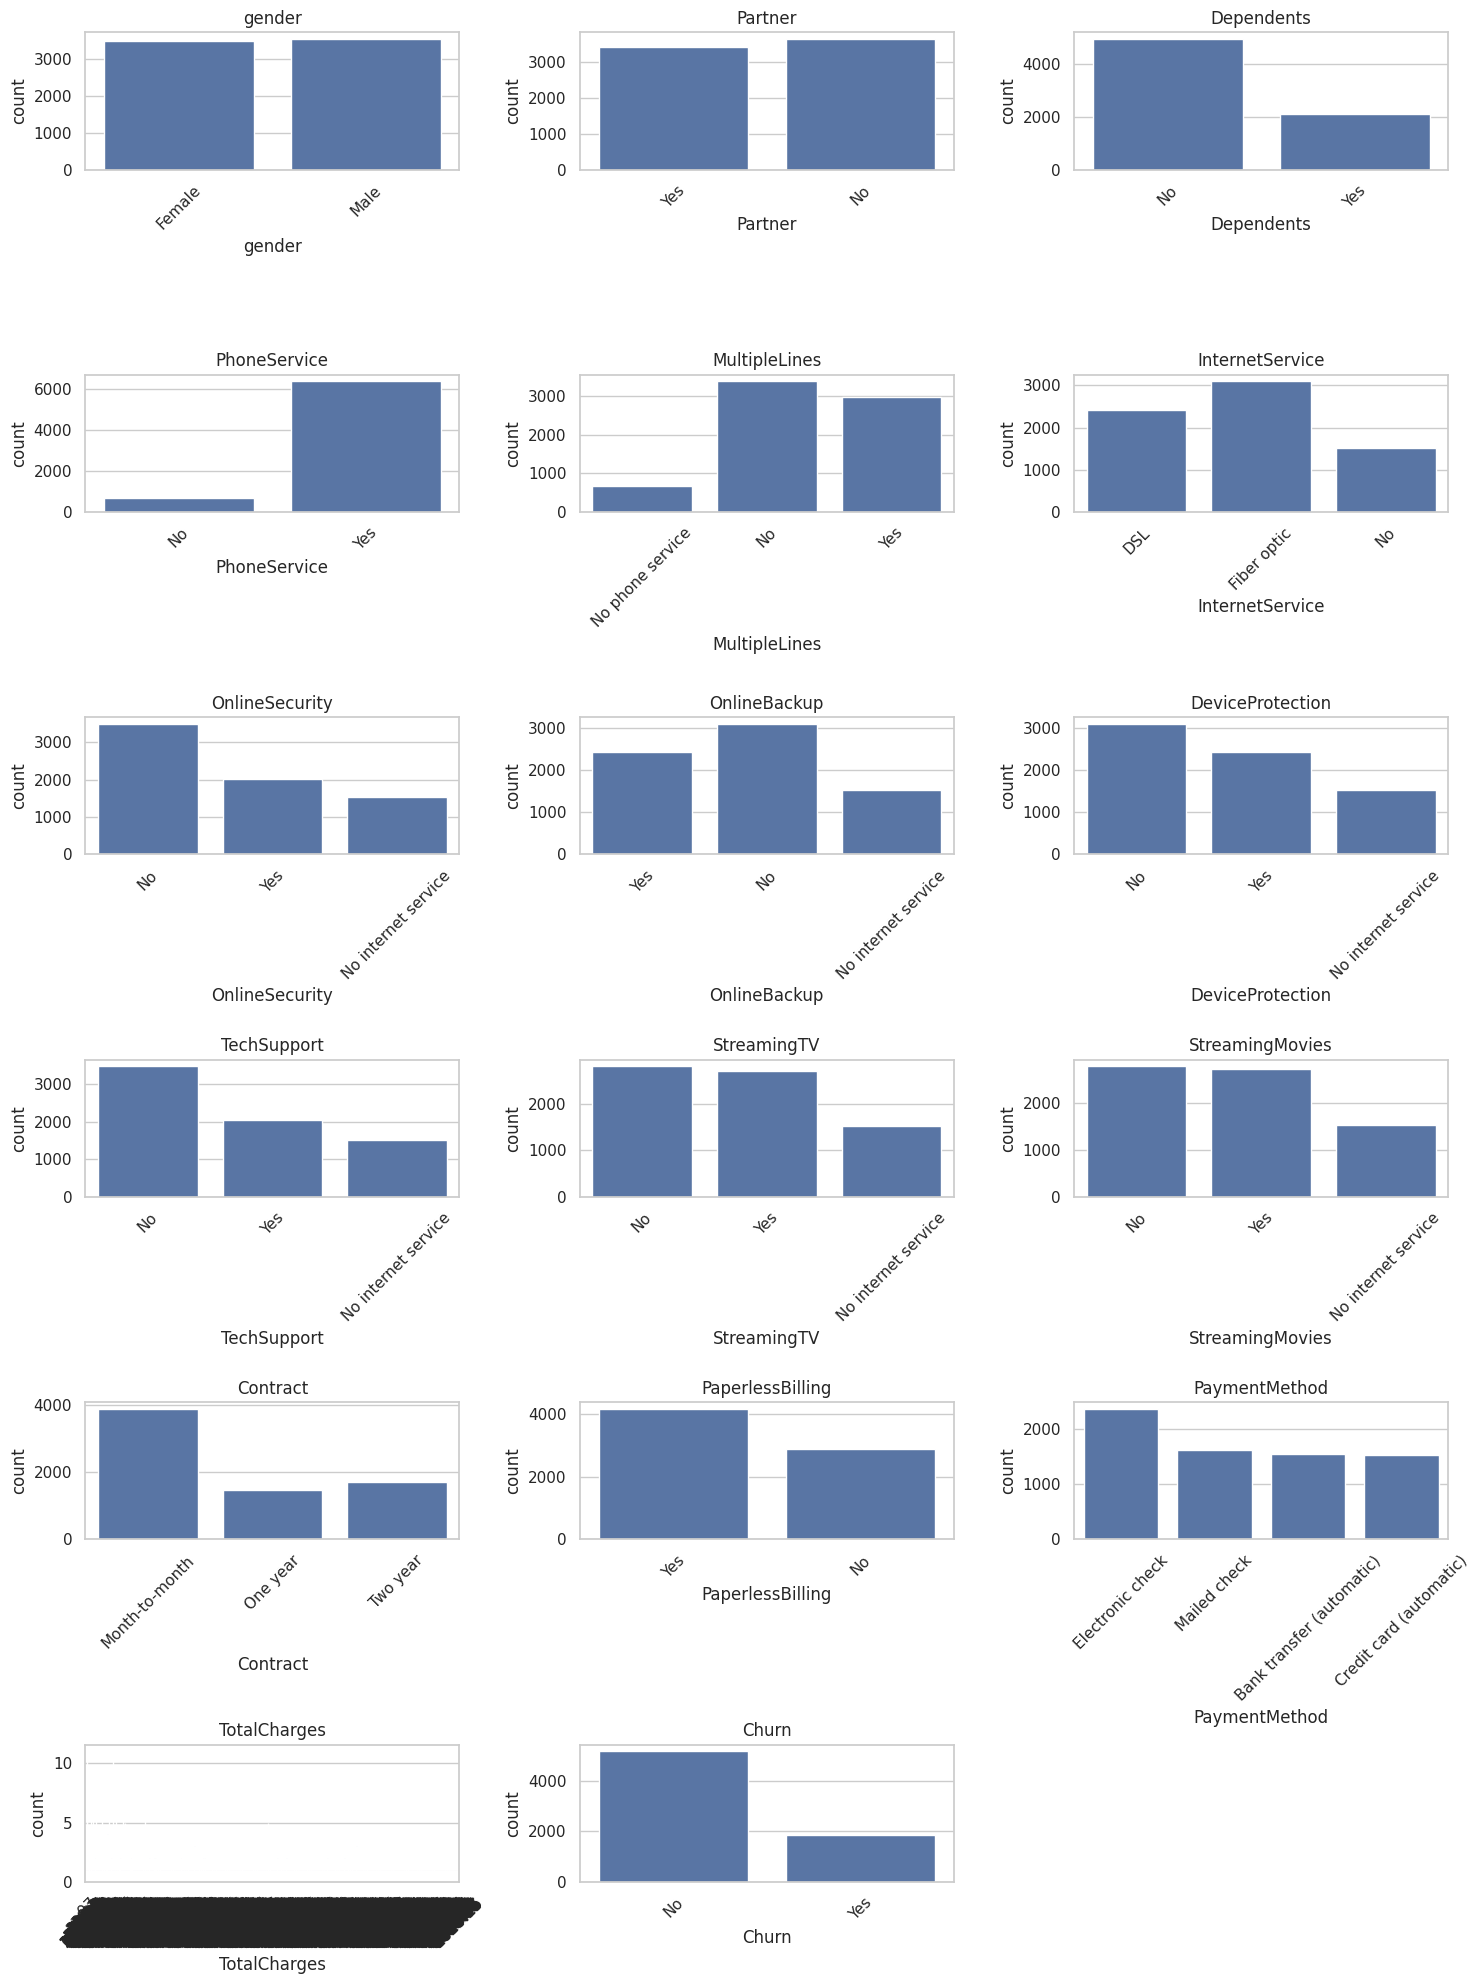

In [165]:
# Visualize the distribution of categorical features using bar plots
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

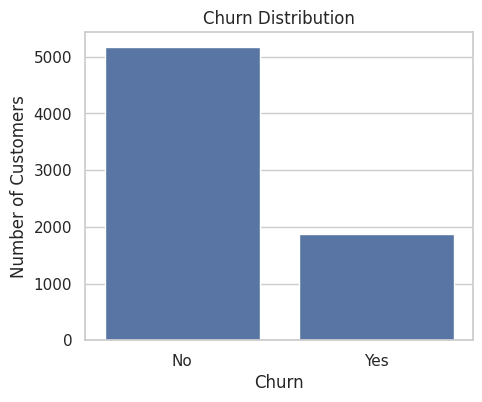

In [166]:
# Visualize the distribution of the target variable (Churn) using a bar plot
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

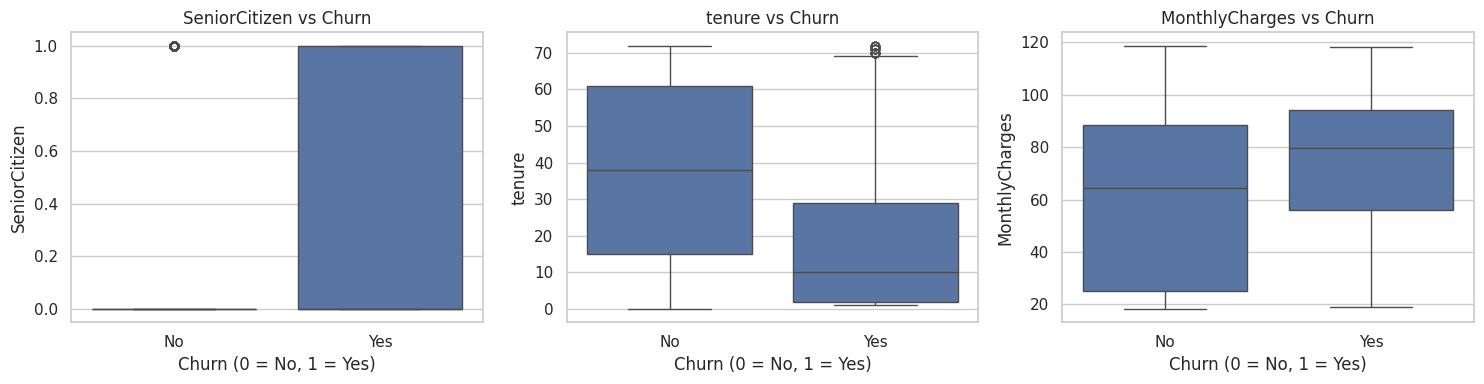

In [167]:
# Visualize the relationship between numerical features and the target variable (Churn)
# using boxplots to compare distributions for churned and non-churned customers
num_cols = data.select_dtypes(include=['int64','float64']).columns

# Exclude the target variable 'Churn' from numerical feature plotting
num_cols = [col for col in num_cols if col != 'Churn']

# Create boxplots for each numerical feature against Churn
plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data['Churn'], y=data[col])
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4188179004.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn", loc="upper right")


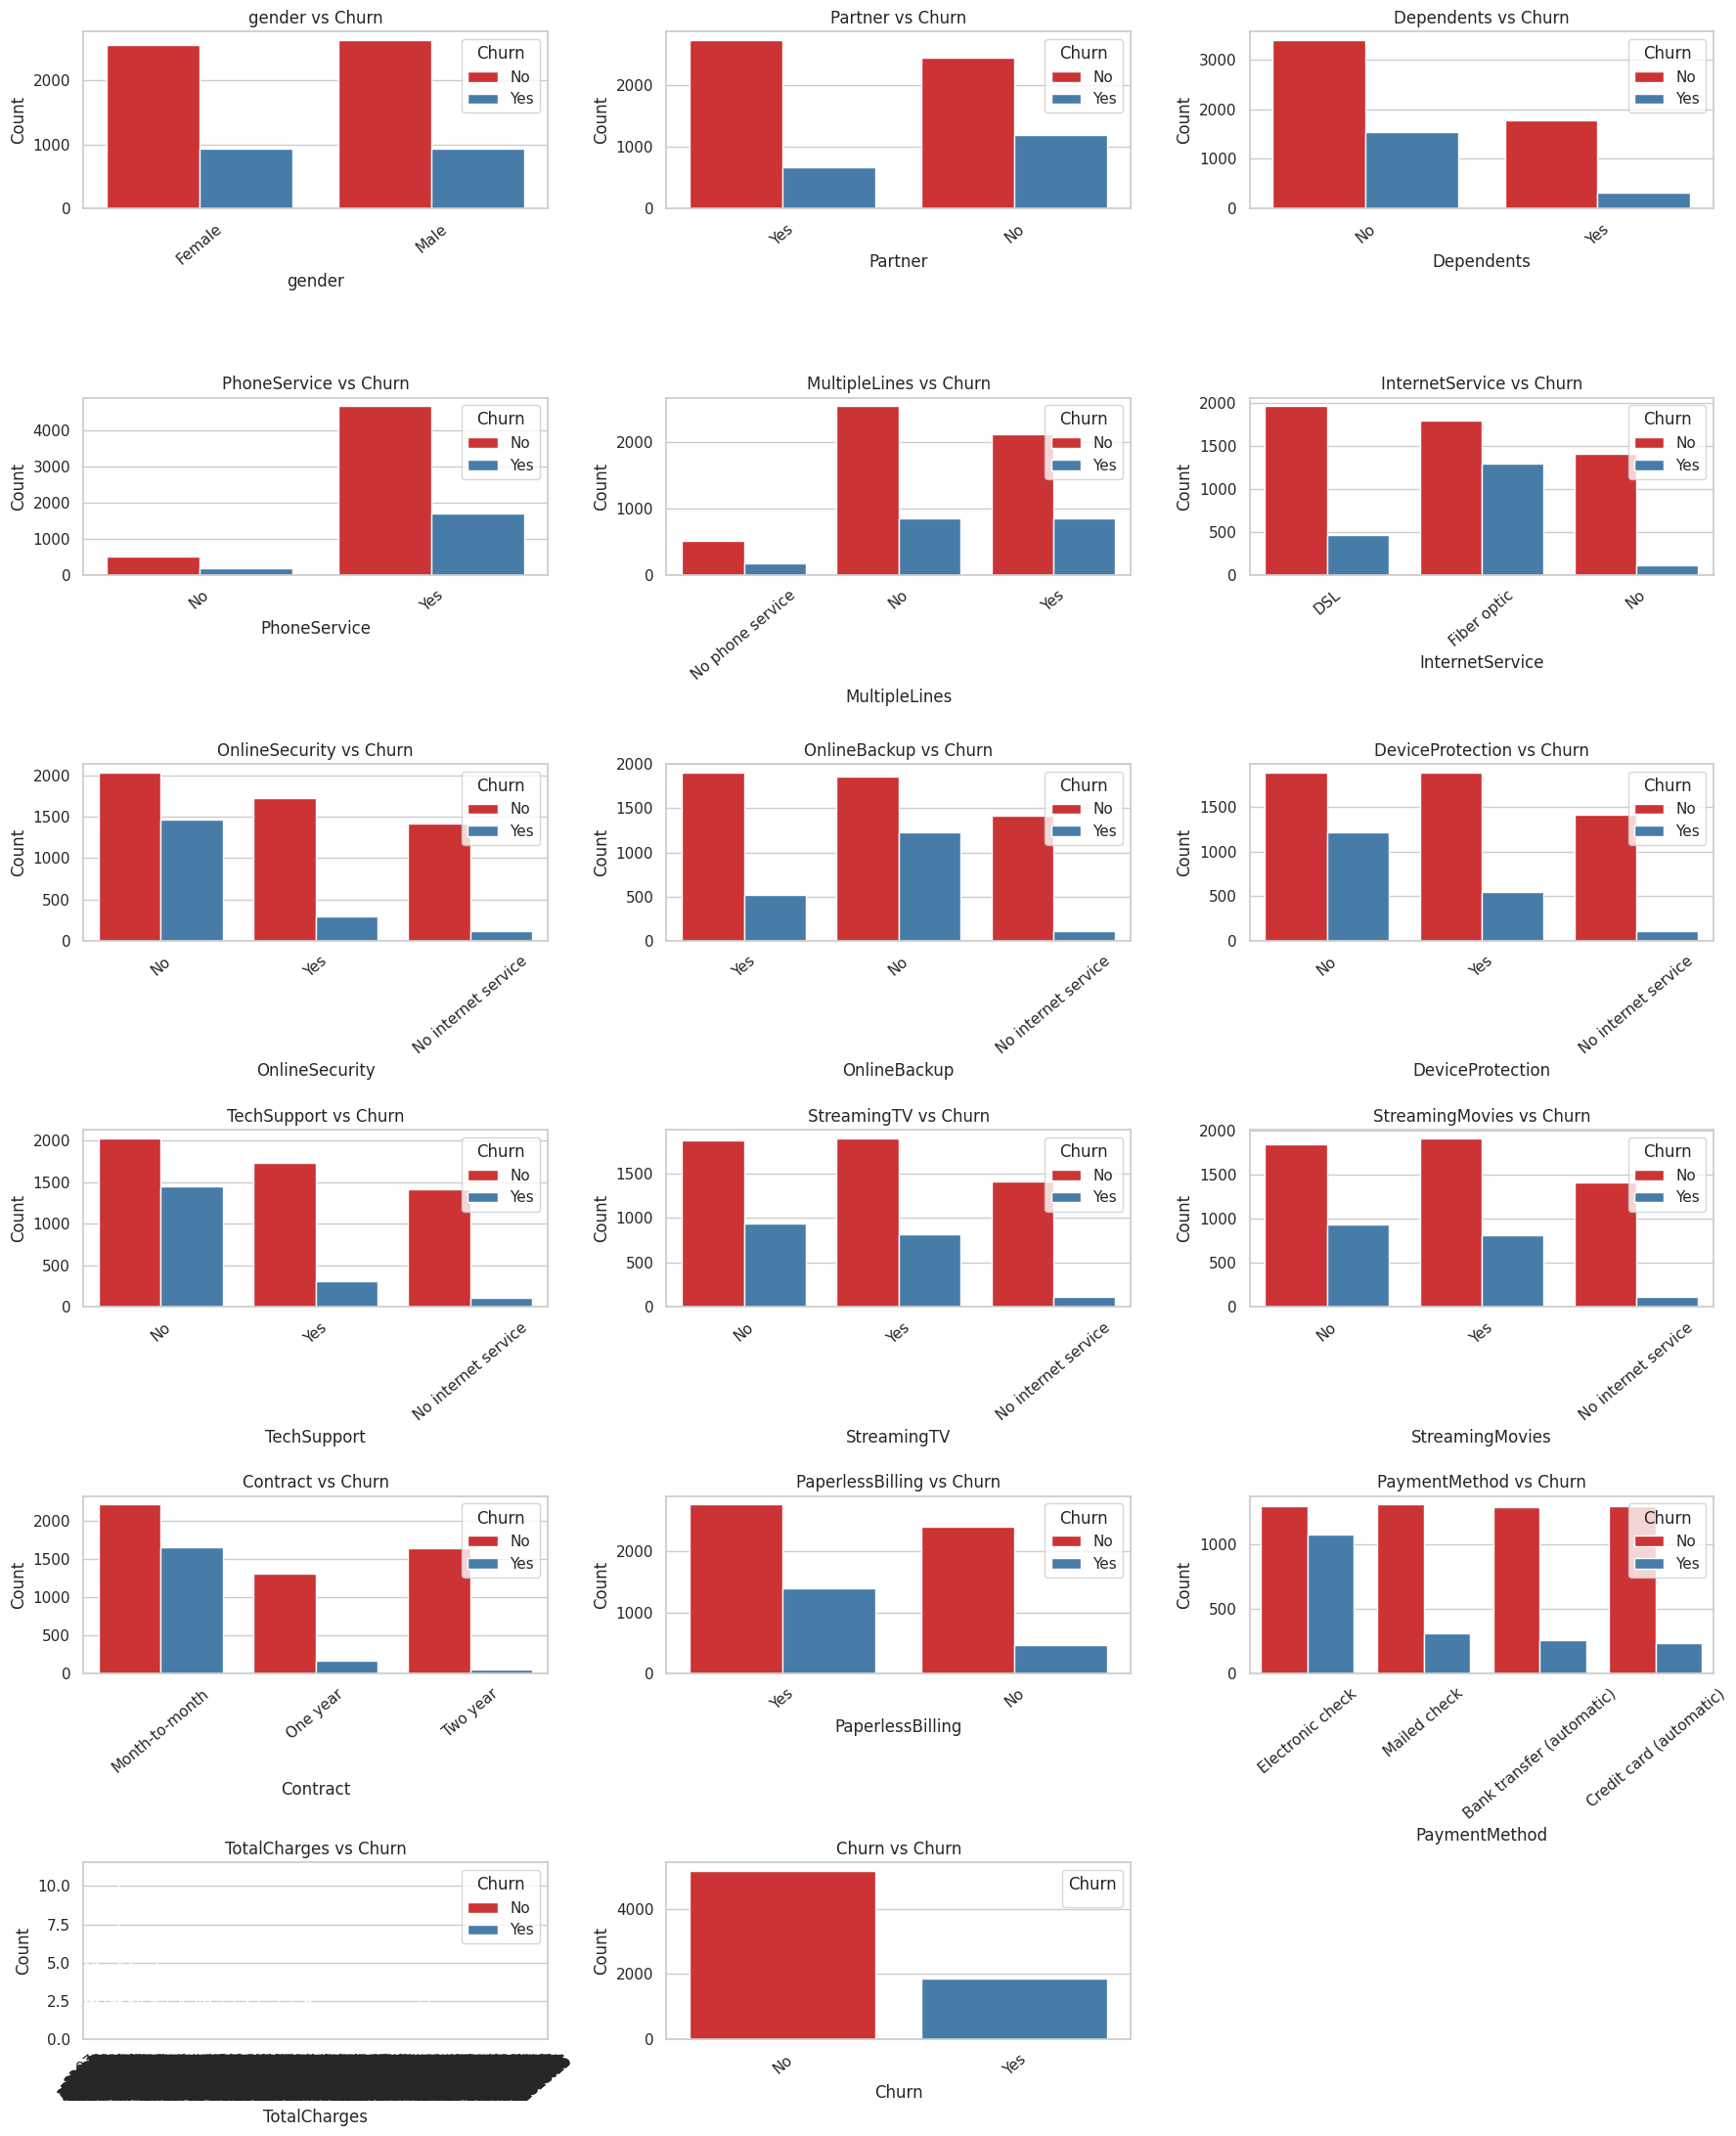

In [168]:
# Visualize the relationship between categorical features and the target variable (Churn)
# using grouped bar plots to compare churned and non-churned customers
categorical_cols = [
    c for c in data.columns
    if data[c].dtype == "O" and c != "customerID"
]

plt.figure(figsize=(18, 22))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(
        x=col,
        hue='Churn',
        data=data,
        palette='Set1'
    )
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=40)
    plt.legend(title="Churn", loc="upper right")

plt.tight_layout()
plt.show()


=== Churn percentage for SeniorCitizen ===
Churn                       No        Yes
SeniorCitizen_group                      
(-0.001, 0.2]        76.393832  23.606168
(0.8, 1.0]           58.318739  41.681261


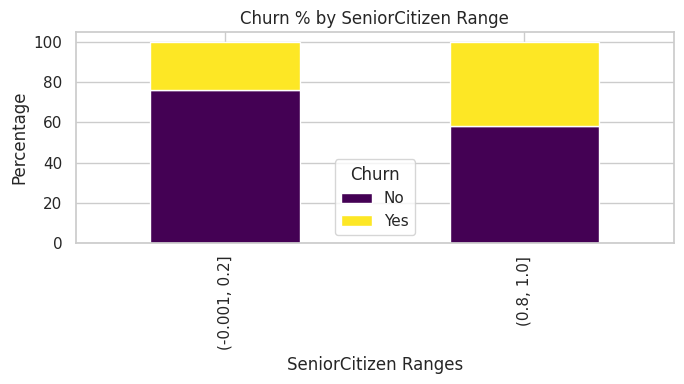


=== Churn percentage for tenure ===
Churn                  No        Yes
tenure_group                        
(-0.072, 14.4]  53.648250  46.351750
(14.4, 28.8]    73.801066  26.198934
(28.8, 43.2]    78.260870  21.739130
(43.2, 57.6]    85.005280  14.994720
(57.6, 72.0]    92.670807   7.329193


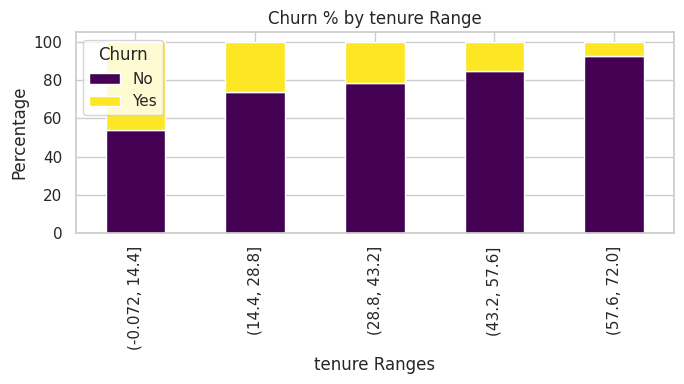


=== Churn percentage for MonthlyCharges ===
Churn                        No        Yes
MonthlyCharges_group                      
(18.15, 38.35]        88.592098  11.407902
(38.35, 58.45]        73.034826  26.965174
(58.45, 78.55]        70.519386  29.480614
(78.55, 98.65]        63.033954  36.966046
(98.65, 118.75]       69.942748  30.057252


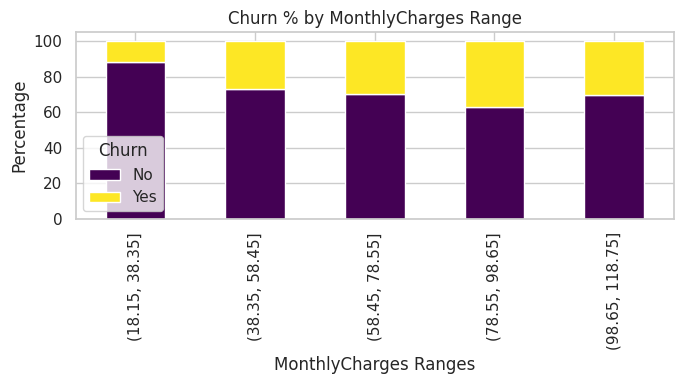

In [169]:
# Analyse the relationship between numerical features and churn by grouping values into ranges
# and visualising churn percentages using stacked bar charts
num_cols = [c for c in data.select_dtypes(include=['int64','float64']).columns if c != "Churn"]

for col in num_cols:
    print(f"\n=== Churn percentage for {col} ===")

    # Create five equal-width bins for the numerical feature
    data[f"{col}_group"] = pd.cut(data[col], bins=5)

    # Compute churn percentage within each value range
    churn_by_bin = pd.crosstab(
        data[f"{col}_group"],
        data['Churn'],
        normalize='index'
    ) * 100
    print(churn_by_bin)

    # Plot stacked bar chart to visualise churn distribution by range
    churn_by_bin.plot(kind="bar", stacked=True, figsize=(7,4), colormap="viridis")
    plt.title(f"Churn % by {col} Range")
    plt.xlabel(f"{col} Ranges")
    plt.ylabel("Percentage")
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

    # Remove temporary grouped column
    data.drop(columns=[f"{col}_group"], inplace=True)

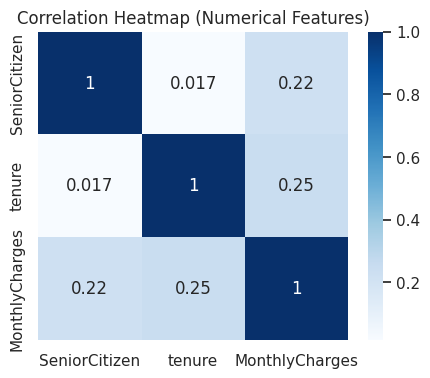

In [170]:
# Select numerical features and compute correlations to examine relationships between them
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot a correlation heatmap for numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

#**Data Preprocessing**

In [171]:
# Reload the dataset and examine its shape before and after removing duplicate records
data = pd.read_csv(path)

# Shape before removing duplicates
print("Shape before duplicate drop:", data.shape)
print()

# Remove duplicate rows from the dataset
data = data.drop_duplicates()

# Shape after removing duplicates
print("Shape after duplicate drop:", data.shape)

Shape before duplicate drop: (7043, 21)

Shape after duplicate drop: (7043, 21)


In [172]:
# Identify categorical and numerical columns in the dataset
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


Prepare dataframe for modelling

In [173]:
# Remove the customerID column as it is not useful for prediction
data.drop("customerID", axis=1, inplace=True)

In [174]:
# Display the dataset shape after preprocessing and preview the updated data
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [175]:
# Identify categorical and numerical columns in the dataset
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [176]:
# Convert the TotalCharges column to numeric format, coercing invalid values to NaN
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [177]:
# Count the number of NaN values in the TotalCharges column after conversion
nan_count = data["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")

NaN values in TotalCharges: 11


In [178]:
# Impute missing TotalCharges values using the median to preserve distribution robustness
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [179]:
# Display the dataset shape after handling missing values
print(data.shape)

(7043, 20)


In [180]:
# Verify that there are no remaining NaN values in the TotalCharges column
nan_count = data["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")


NaN values in TotalCharges: 0


Encode target variable

In [181]:
# Encode the target variable (Churn) into numerical format for model training
labeler = LabelEncoder()
data["Churn"] = labeler.fit_transform(data["Churn"])

# Verify the encoded class distribution
print(data["Churn"].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


In [182]:
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [183]:
# Separate features (X) and target variable (y) for model training
X = data.drop('Churn', axis=1)
y = data['Churn']

In [184]:
# Convert categorical features into numerical format using One-Hot Encoding
# drop_first=True is used to avoid the dummy variable trap
X = pd.get_dummies(X, drop_first=True)

# Display the shape of the encoded feature matrix and preview the data
print(X.shape)
X.head()

(7043, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


# **Model Training**

In [185]:
# Install the imbalanced-learn library to handle class imbalance using SMOTE
!pip install imbalanced-learn

In [186]:
# Apply SMOTE to balance the target classes by oversampling the minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Compare class distribution before and after applying SMOTE
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


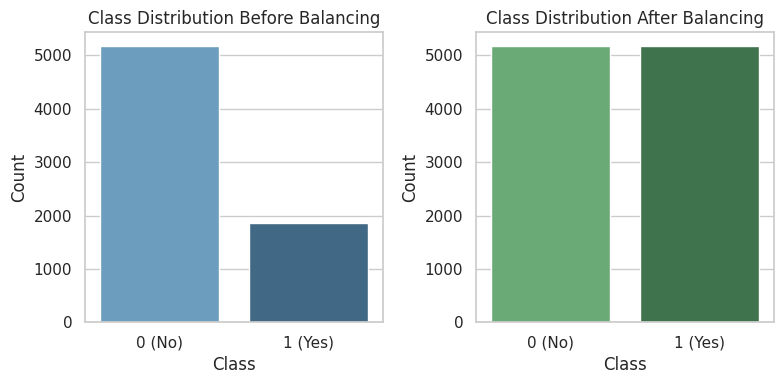

In [187]:
# Visualize class distribution before and after applying SMOTE to confirm dataset balancing
before_counts = y.value_counts()
after_counts = y_resampled.value_counts()

plt.figure(figsize=(8,4))

# --- Before SMOTE ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=before_counts.index,
    y=before_counts.values,
    hue=before_counts.index,
    palette="Blues_d",
    legend=False
)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

# --- After SMOTE ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    hue=after_counts.index,
    palette="Greens_d",
    legend=False
)
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

plt.tight_layout()
plt.show()


In [188]:

# Split the balanced dataset into training, validation, and test sets using stratified sampling
from sklearn.model_selection import train_test_split

# 1) Split data into training (60%) and temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled,
    test_size=0.40,
    random_state=42,
    stratify=y_resampled
)

# 2) Split the temporary set equally into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

# Display the sizes of the resulting datasets
print("Train size      :", X_train.shape)


Train size      : (6208, 30)


Scaling for Neural Network

In [189]:
# Apply feature scaling using StandardScaler to normalize numerical features
# The scaler is fitted on the training data and applied to validation and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Decision Tree Classifier

In [190]:
# Build and evaluate a Neural Network model for customer churn prediction
# The model is trained on scaled features and evaluated using training,
# validation, and test datasets with standard classification metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define input dimension based on the number of features
input_dim = X_train_scaled.shape[1]

# Initialize the Neural Network architecture
nn_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model with Adam optimizer and binary cross-entropy loss
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Apply early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the Neural Network model
history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=0
)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---- Training set evaluation ----
train_prob = nn_model.predict(X_train_scaled)
train_pred = (train_prob >= 0.5).astype(int)
print("=== Neural Network: TRAIN SET ===")
print(classification_report(y_train, train_pred))
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))

# ---- Validation set evaluation ----
val_prob = nn_model.predict(X_val_scaled)
val_pred = (val_prob >= 0.5).astype(int)
print("\n=== Neural Network: VALIDATION SET ===")
print(classification_report(y_val, val_pred))
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

# ---- Test set evaluation ----
test_prob = nn_model.predict(X_test_scaled)
test_pred = (test_prob >= 0.5).astype(int)
print("\n=== Neural Network: TEST SET ===")
print(classification_report(y_test, test_pred))
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Neural Network: TRAIN SET ===
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3104
           1       0.91      0.84      0.88      3104

    accuracy                           0.88      6208
   macro avg       0.88      0.88      0.88      6208
weighted avg       0.88      0.88      0.88      6208

Accuracy: 0.8804768041237113
Confusion Matrix:
 [[2861  243]
 [ 499 2605]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Neural Network: VALIDATION SET ===
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1035
           1       0.86      0.78      0.82      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Accuracy: 0.8256038647342995
Confusion Matrix:
 [[899 136]
 [225 810]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Ne

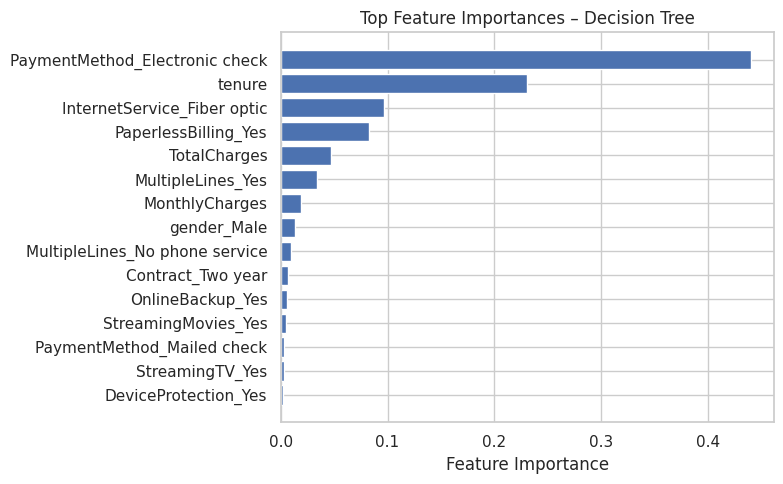

In [191]:
# Visualize the most important features identified by the Decision Tree model
# Feature importance values indicate how much each feature contributes to churn prediction
import numpy as np

# Extract feature names from the encoded feature set
feature_names = X.columns   # Same feature set used before SMOTE

# Retrieve feature importance scores from the trained Decision Tree
importances = dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance (descending)

top_n = 15  # Display top 15 most important features
top_idx = indices[:top_n]

# Plot horizontal bar chart of top feature importances
plt.figure(figsize=(8, 5))
plt.barh(range(len(top_idx)), importances[top_idx][::-1])
plt.yticks(range(len(top_idx)), feature_names[top_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Top Feature Importances – Decision Tree")
plt.tight_layout()
plt.show()

In [192]:
# Build and evaluate a Neural Network model for customer churn prediction
# The model is trained on scaled features and evaluated using training,
# validation, and test datasets with standard classification metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define input dimension based on the number of features
input_dim = X_train_scaled.shape[1]

# Initialize the Neural Network architecture
nn_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model with Adam optimizer and binary cross-entropy loss
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Apply early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the Neural Network model
history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=0
)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---- Training set evaluation ----
train_prob = nn_model.predict(X_train_scaled)
train_pred = (train_prob >= 0.5).astype(int)
print("=== Neural Network: TRAIN SET ===")
print(classification_report(y_train, train_pred))
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))

# ---- Validation set evaluation ----
val_prob = nn_model.predict(X_val_scaled)
val_pred = (val_prob >= 0.5).astype(int)
print("\n=== Neural Network: VALIDATION SET ===")
print(classification_report(y_val, val_pred))
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

# ---- Test set evaluation ----
test_prob = nn_model.predict(X_test_scaled)
test_pred = (test_prob >= 0.5).astype(int)
print("\n=== Neural Network: TEST SET ===")
print(classification_report(y_test, test_pred))
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Neural Network: TRAIN SET ===
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3104
           1       0.85      0.89      0.87      3104

    accuracy                           0.87      6208
   macro avg       0.87      0.87      0.87      6208
weighted avg       0.87      0.87      0.87      6208

Accuracy: 0.8677512886597938
Confusion Matrix:
 [[2616  488]
 [ 333 2771]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Neural Network: VALIDATION SET ===
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1035
           1       0.81      0.86      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Accuracy: 0.8289855072463768
Confusion Matrix:
 [[826 209]
 [145 890]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Ne

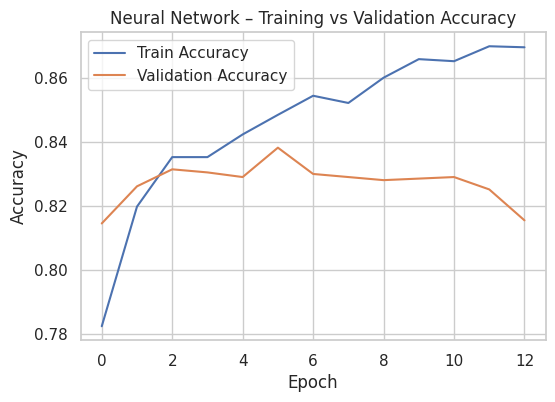

In [193]:
# Plot training and validation accuracy across epochs to monitor Neural Network learning behavior
# and identify potential overfitting or underfitting
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network – Training vs Validation Accuracy')
plt.legend()
plt.show()

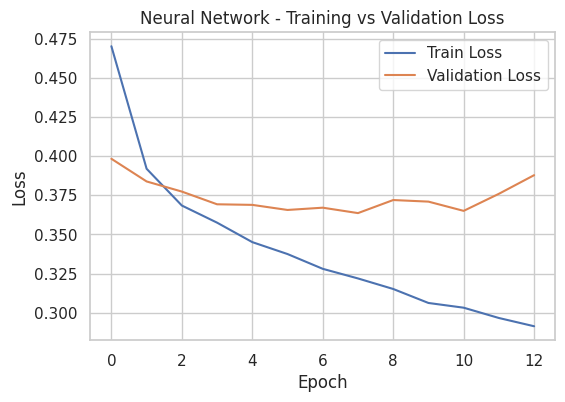

In [194]:
# Neural network training vs validation loss graph
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network - Training vs Validation Loss')
plt.legend()
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


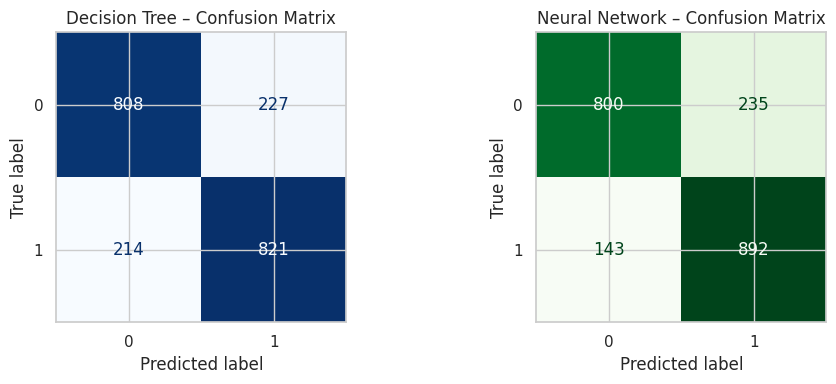

In [195]:
# Compare the classification performance of the Decision Tree and Neural Network
# using confusion matrices on the test dataset

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# ---- Generate predictions for the test set ----
y_test_pred_dt = dt_clf.predict(X_test)           # Decision Tree predictions
test_prob = nn_model.predict(X_test_scaled)       # Neural Network probabilities
y_test_pred_nn = (test_prob >= 0.5).astype(int)   # Neural Network class labels

# ---- Compute confusion matrices ----
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

# ---- Plot confusion matrices side by side ----
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Decision Tree confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0, 1])
disp_dt.plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Decision Tree – Confusion Matrix")

# Neural Network confusion matrix
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
disp_nn.plot(ax=axes[1], cmap="Greens", colorbar=False)
axes[1].set_title("Neural Network – Confusion Matrix")

plt.tight_layout()
plt.show()

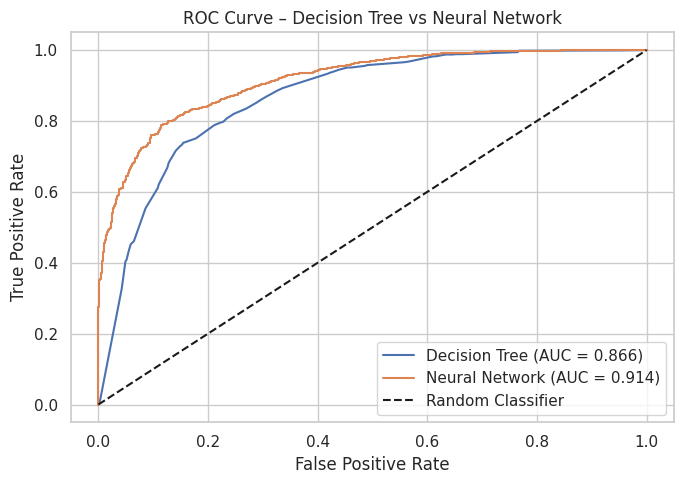

In [196]:
# Compare the predictive performance of the Decision Tree and Neural Network
# using ROC curves and Area Under the Curve (AUC) on the test dataset

from sklearn.metrics import roc_curve, roc_auc_score

# ---- Decision Tree predicted probabilities ----
dt_test_proba = dt_clf.predict_proba(X_test)[:, 1]

# ---- Neural Network predicted probabilities ----
nn_test_proba = test_prob.ravel()   # Flatten to 1D array

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_test_proba)
auc_dt = roc_auc_score(y_test, dt_test_proba)

# Compute ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_test_proba)
auc_nn = roc_auc_score(y_test, nn_test_proba)

# Plot ROC curves for both models
plt.figure(figsize=(7, 5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree vs Neural Network")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

            Model  Accuracy  Precision    Recall  F1-score
0   Decision Tree  0.786957   0.783397  0.793237  0.788286
1  Neural Network  0.817391   0.791482  0.861836  0.825162


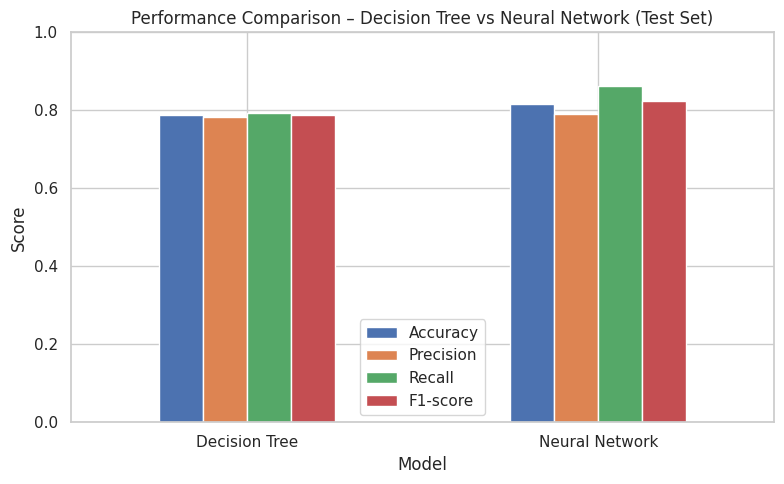

In [197]:
# Compare the performance of the Decision Tree and Neural Network models
# using standard classification metrics on the test dataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ----- Decision Tree evaluation metrics -----
acc_dt  = accuracy_score(y_test, y_test_pred_dt)
prec_dt = precision_score(y_test, y_test_pred_dt)
rec_dt  = recall_score(y_test, y_test_pred_dt)
f1_dt   = f1_score(y_test, y_test_pred_dt)

# ----- Neural Network evaluation metrics -----
acc_nn  = accuracy_score(y_test, y_test_pred_nn)
prec_nn = precision_score(y_test, y_test_pred_nn)
rec_nn  = recall_score(y_test, y_test_pred_nn)
f1_nn   = f1_score(y_test, y_test_pred_nn)

# Create a comparison table of evaluation metrics
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Neural Network"],
    "Accuracy": [acc_dt, acc_nn],
    "Precision": [prec_dt, prec_nn],
    "Recall": [rec_dt, rec_nn],
    "F1-score": [f1_dt, f1_nn]
})

# Display metric comparison table
print(results_df)

# Visualize metric comparison using a bar chart
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(8,5)
)
plt.ylim(0, 1)
plt.title("Performance Comparison – Decision Tree vs Neural Network (Test Set)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

            Model  Accuracy  Precision    Recall  F1-score
0   Decision Tree  0.786957   0.783397  0.793237  0.788286
1  Neural Network  0.817391   0.791482  0.861836  0.825162


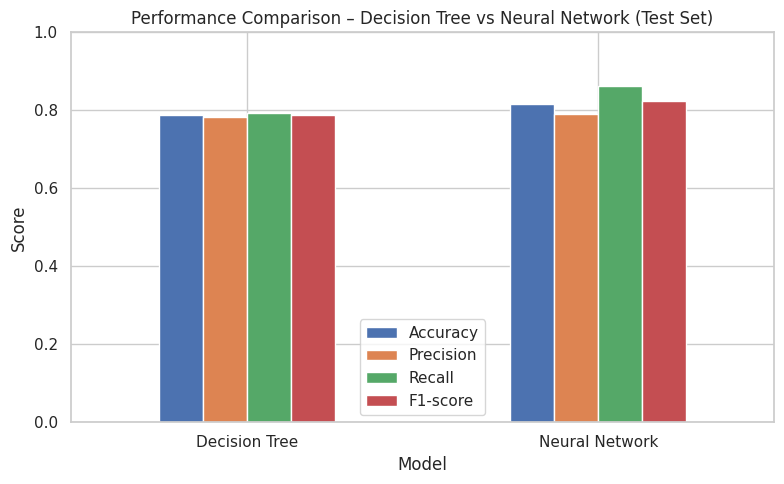

In [198]:
# Compare the performance of the Decision Tree and Neural Network models
# using standard classification metrics on the test dataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ----- Decision Tree evaluation metrics -----
acc_dt  = accuracy_score(y_test, y_test_pred_dt)
prec_dt = precision_score(y_test, y_test_pred_dt)
rec_dt  = recall_score(y_test, y_test_pred_dt)
f1_dt   = f1_score(y_test, y_test_pred_dt)

# ----- Neural Network evaluation metrics -----
acc_nn  = accuracy_score(y_test, y_test_pred_nn)
prec_nn = precision_score(y_test, y_test_pred_nn)
rec_nn  = recall_score(y_test, y_test_pred_nn)
f1_nn   = f1_score(y_test, y_test_pred_nn)

# Create a comparison table of evaluation metrics
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Neural Network"],
    "Accuracy": [acc_dt, acc_nn],
    "Precision": [prec_dt, prec_nn],
    "Recall": [rec_dt, rec_nn],
    "F1-score": [f1_dt, f1_nn]
})

# Display metric comparison table
print(results_df)

# Visualize metric comparison using a bar chart
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(8,5)
)
plt.ylim(0, 1)
plt.title("Performance Comparison – Decision Tree vs Neural Network (Test Set)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [199]:
# Perform hyperparameter tuning for the Neural Network using a randomized search strategy
# Multiple architectures and training configurations are evaluated based on validation ROC-AUC

import itertools, random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Set random seed for reproducibility
random.seed(42)

# Define the hyperparameter search space
search_space = {
    'units1': [32, 64, 128],      # neurons in first hidden layer
    'units2': [16, 32, 64],       # neurons in second hidden layer
    'dropout': [0.0, 0.2, 0.4],   # dropout rates
    'lr': [1e-3, 5e-4, 1e-4],     # learning rates
    'batch_size': [32, 64],       # batch sizes
}

# Generate all combinations and randomly sample a subset
all_combos = list(itertools.product(
    search_space['units1'],
    search_space['units2'],
    search_space['dropout'],
    search_space['lr'],
    search_space['batch_size']
))

random.shuffle(all_combos)
n_trials = min(10, len(all_combos))  # limit trials for efficiency
trials = all_combos[:n_trials]

# Function to build Neural Network model based on given hyperparameters
def make_model(input_dim, units1, units2, dropout, lr):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(units1, activation='relu'),
        Dropout(dropout),
        Dense(units2, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

best_nn = None
best_val_auc = -1.0
results = []

# Train and evaluate models using validation ROC-AUC
for (u1, u2, do, lr, bs) in trials:
    print(f"Trial: units {u1}/{u2} drop {do} lr {lr} bs {bs}")

    model = make_model(X_train_scaled.shape[1], u1, u2, do, lr)

    es = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=0
    )

    model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=50,
        batch_size=bs,
        callbacks=[es],
        verbose=0
    )

    # Evaluate model on validation set
    val_proba = model.predict(X_val_scaled).ravel()
    val_auc = roc_auc_score(y_val, val_proba)

    results.append({
        'units1': u1, 'units2': u2,
        'dropout': do, 'lr': lr,
        'batch_size': bs,
        'val_auc': val_auc
    })

    print(" -> Val AUC:", round(val_auc, 4))

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_nn = model

# Display top-performing configurations
res_df = pd.DataFrame(results).sort_values('val_auc', ascending=False)
print("\nTop NN results:\n", res_df.head())

# Final evaluation on the test set using the best model
if best_nn is not None:
    test_proba = best_nn.predict(X_test_scaled).ravel()
    test_auc = roc_auc_score(y_test, test_proba)
    test_pred = (test_proba >= 0.5).astype(int)

    print("\nBest NN Validation ROC-AUC:", round(best_val_auc, 4))
    print("Best NN Test ROC-AUC:", round(test_auc, 4))
    print("Best NN Test Accuracy:", accuracy_score(y_test, test_pred))
    print(classification_report(y_test, test_pred))


Trial: units 64/16 drop 0.2 lr 0.001 bs 64
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.9248
Trial: units 64/32 drop 0.4 lr 0.0001 bs 64
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.9064
Trial: units 64/64 drop 0.4 lr 0.0005 bs 32
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.9246
Trial: units 32/64 drop 0.2 lr 0.001 bs 32
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.9249
Trial: units 128/64 drop 0.0 lr 0.001 bs 32
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 -> Val AUC: 0.921
Trial: units 64/32 drop 0.4 lr 0.001 bs 64
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 -> Val AUC: 0.9237
Trial: units 128/32 drop 0.2 lr 0.001 bs 64
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.921
Trial: units 32/16 drop 0.2 lr 0.0001 bs 64
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.905
Trial: units 128/32 drop 0.2 lr 0.0001 bs 32
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 -> Val AUC: 0.9174
Trial: units 64/16 drop 0.4 lr 0.001 bs 32
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s